In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [2]:
dataSet = pd.read_csv("./googleplaystore.csv")
dataSet.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Part 1: Data Inspection & outlier Removal

In [3]:
print(dataSet.shape)

(10841, 13)


The Data has 10841 Records and 13 features.

In [4]:
total = dataSet.isnull().sum().sort_values(ascending=False)
total

Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
Last Updated         0
Genres               0
Price                0
Installs             0
Size                 0
Reviews              0
Category             0
App                  0
dtype: int64

### Rating

The rating has the largest number of missing values

In [5]:
dataSet['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

The describe show that the Rating column has mean of 4.19 , a min of 1 and max of 19.
The count of non null values is 9367 which means 10841-9367=1474 null values for the rating.

In [6]:
dataSet['Rating'].value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.6       25
2.7       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
2.1        8
1.7        8
1.8        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

# The value 19 is an outlier to the rating range so it will be replaced by nan for now.

In [7]:
dataSet[dataSet['Rating']==19].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [8]:
dataSet['Rating']=dataSet['Rating'].replace(19,np.NaN)
dataSet['Rating'].value_counts().tail()

1.8    8
1.6    4
1.4    3
1.5    3
1.2    1
Name: Rating, dtype: int64

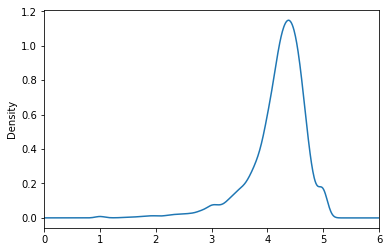

In [9]:
dataSet.Rating.dropna().plot(kind='kde', xlim=(0,6))

### Conclusion
Most app ratings are concentrated between 3-5.

## Category

In [10]:
categories=dataSet['Category'].unique()
categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [11]:
dataSet.describe(include=[np.object])['Category']

count      10841
unique        34
top       FAMILY
freq        1972
Name: Category, dtype: object

In [12]:
len(categories)

34

In [13]:
dataSet['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

#### We have 34 unique Categories
#### The 1.9 value is an OUTLIER so its record will be removed

In [14]:
dataSet[dataSet['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,NaN,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
dataSet=dataSet[dataSet['Category']!='1.9']

In [16]:
dataSet['Category'].value_counts().tail()

ART_AND_DESIGN    65
EVENTS            64
COMICS            60
PARENTING         60
BEAUTY            53
Name: Category, dtype: int64

#### Category 1.9 is now removed

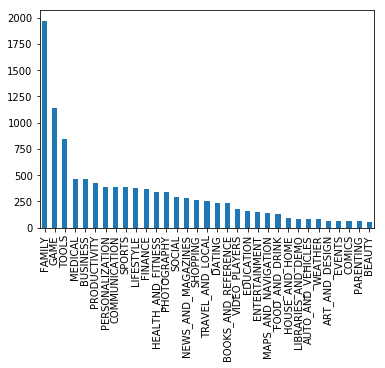

In [17]:
dataSet['Category'].value_counts().plot(kind='bar')

#### The family category is the most frequent category.

### Genres

In [18]:
Genres=dataSet['Genres'].unique()
Genres

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [19]:
dataSet.describe(include=[np.object])['Genres']

count     10840
unique      119
top       Tools
freq        842
Name: Genres, dtype: object

In [20]:
dataSet['Genres'].value_counts()

Tools                                  842
Entertainment                          623
Education                              549
Medical                                463
Business                               460
Productivity                           424
Sports                                 398
Personalization                        392
Communication                          387
Lifestyle                              381
Finance                                366
Action                                 365
Health & Fitness                       341
Photography                            335
Social                                 295
News & Magazines                       283
Shopping                               260
Travel & Local                         257
Dating                                 234
Books & Reference                      231
Arcade                                 220
Simulation                             200
Casual                                 193
Video Playe

#### <span style="color:red">  As seen the sub-genres (ones after;) in some cases have very low frequencies, so the sub-genres will be removed and will only leave main genres in order no to affect the rating distribution.</span>

In [21]:
dataSet['Genres'] = dataSet['Genres'].str.split(';').str[0]

In [22]:
dataSet['Genres'].value_counts()

Tools                      843
Entertainment              667
Education                  645
Medical                    463
Business                   460
Productivity               424
Sports                     402
Personalization            392
Communication              388
Lifestyle                  383
Action                     382
Finance                    366
Health & Fitness           343
Photography                335
Social                     295
News & Magazines           283
Casual                     270
Shopping                   260
Travel & Local             258
Arcade                     237
Books & Reference          234
Dating                     234
Simulation                 218
Video Players & Editors    178
Puzzle                     167
Maps & Navigation          137
Food & Drink               127
Role Playing               123
Racing                     119
Educational                112
Strategy                   111
Adventure                   91
House & 

#### <span style="color:blue">Music and Audio is considered as an outlier, so it will be replaced by Music</span>

In [23]:
dataSet[dataSet['Genres']=='Music & Audio']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2142,Toy Guitar with songs for kids,FAMILY,4.3,1369,9.8M,"500,000+",Free,0,Everyone,Music & Audio,"March 5, 2016",1.0.3,2.3 and up


In [24]:
newGenres=dataSet['Genres'].replace(to_replace='Music & Audio',value="Music")

In [25]:
dataSet['Genres']=newGenres

In [26]:
dataSet['Genres'].value_counts().tail()

Card      51
Trivia    39
Casino    39
Word      29
Music     26
Name: Genres, dtype: int64

#### <span style="color:green">Music and Audio is replaced by Music</span>

## Relation between Category and Genres with Rating

In [27]:
#dataSet = dataSet[pd.notnull(dataSet['Rating'])]

# Imputing the Null values of Rating by cluster mean based on the Category attribute   

In [28]:
# first we group the rows by Category
groupedDataSet= dataSet.groupby(["Category"],as_index=False)

In [29]:
# Then we aggregate Rating per Category by MEAN
aggregatedData=groupedDataSet.aggregate({"Rating":'mean'})

In [30]:
aggregatedData.Rating

0     4.358065
1     4.190411
2     4.278571
3     4.346067
4     4.121452
5     4.155172
6     4.158537
7     3.970769
8     4.389032
9     4.126174
10    4.435556
11    4.192272
12    4.131889
13    4.166972
14    4.286326
15    4.277104
16    4.197368
17    4.178462
18    4.094904
19    4.051613
20    4.189143
21    4.132189
22    4.300000
23    4.335987
24    4.192114
25    4.211396
26    4.259664
27    4.255598
28    4.223511
29    4.047411
30    4.109292
31    4.063750
32    4.244000
Name: Rating, dtype: float64

In [32]:
def getRatingValue(data,category):
    for row in data.iterrows():
        #print(row[1].Category)
        if(row[1].Category==category):
            return row[1].Rating

In [36]:
RatingImputed = [] # define array structure
for row in dataSet.iterrows():
    rating=row[1].Rating
    #print('old',rating)
    if(pd.isnull(rating)):
        rating=getRatingValue(aggregatedData,row[1].Category)
        round(rating,1)
        #print('new',rating)
    RatingImputed.append(round(rating,1))
    
dataSet["Rating"] = RatingImputed

In [37]:
dataSet

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design,"July 3, 2018",2.8,4.0.3 and up


In [38]:
total = dataSet.isnull().sum().sort_values(ascending=False)
total

Current Ver       8
Android Ver       2
Type              1
Last Updated      0
Genres            0
Content Rating    0
Price             0
Installs          0
Size              0
Reviews           0
Rating            0
Category          0
App               0
dtype: int64

In [39]:
dataSet.describe()

,Rating
count,10840.000000
mean,4.189862
std,0.480172
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


#### <span style="color:violet">Now the records with null values in the rating has been imputed by Cluster Mean</span>

### Rating and Category

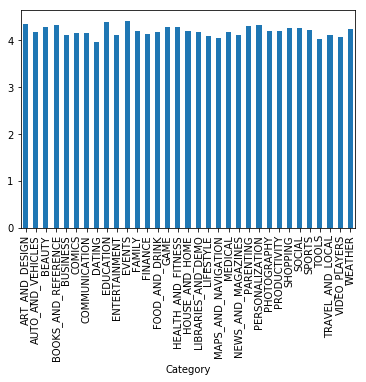

In [40]:
dataSet.groupby('Category').Rating.mean().plot(kind='bar')

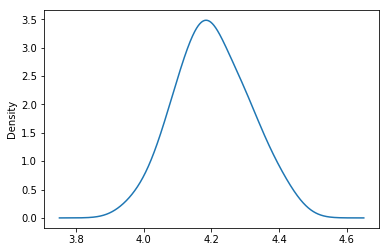

In [41]:
dataSet.groupby('Category').Rating.mean().plot(kind='kde')

#### <span style="color:Red">The bar chart with the rating mean for each category failed to show the distribution clearly so a box plot will be used</span>

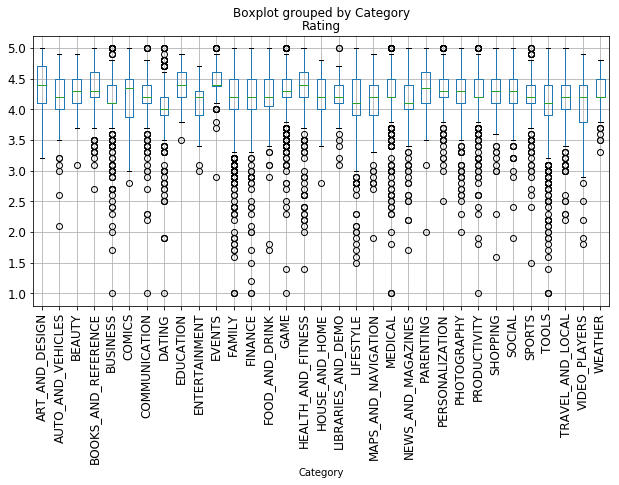

In [42]:
dataSet.boxplot(column='Rating', by='Category',rot=90, fontsize=12, figsize=(10,5), grid=True)

#### <span style="color:Red">As shown, the average rating of each category is nearly the same, in general rating between categories is not that differet</span>

### Genres

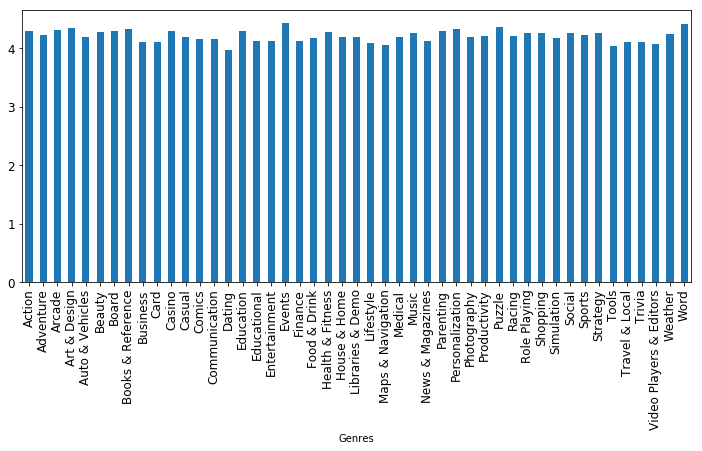

In [43]:
dataSet.groupby('Genres').Rating.mean().plot(kind='bar',figsize=(12,5),fontsize=12)

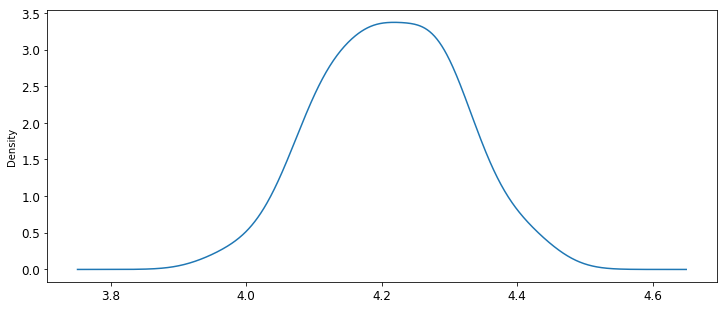

In [44]:
dataSet.groupby('Genres').Rating.mean().plot(kind='kde',figsize=(12,5),fontsize=12)

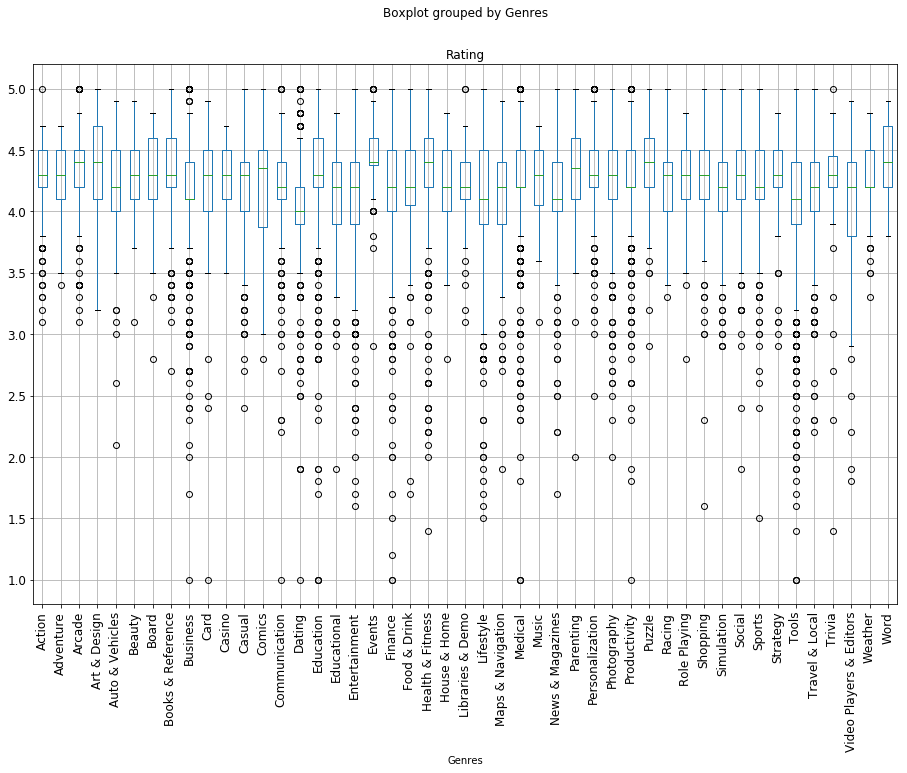

In [45]:
dataSet.boxplot(column='Rating', by='Genres',rot=90, fontsize=12, figsize=(15,10), grid=True)

#### <span style="color:red">The Genres showed the same behaviour as category</span>

### Investigating if the genres within a category affects rating

In [46]:
dataSet.groupby(['Category','Genres']).size().reset_index().rename(columns={0:'count'})

,Category,Genres,count
0,ART_AND_DESIGN,Art & Design,65
1,AUTO_AND_VEHICLES,Auto & Vehicles,85
2,BEAUTY,Beauty,53
3,BOOKS_AND_REFERENCE,Books & Reference,231
4,BUSINESS,Business,460
5,COMICS,Comics,60
6,COMMUNICATION,Communication,387
7,DATING,Dating,234
8,EDUCATION,Education,156
9,ENTERTAINMENT,Entertainment,149


#### <span style="color:Red">Only family and Game have different genres within their category which means that the invistigation cannot be globalized</span>

### Content Rating

In [47]:
# Fill nan values with Everyone
dataSet["Content Rating"] = dataSet["Content Rating"].fillna('Everyone')
# Replace Unrated value with Everyone
dataSet.loc[dataSet['Content Rating'] == 'Unrated', 'Content Rating'] = 'Everyone'
print(dataSet.isnull().sum())
# No more nulls in Content Rating column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64


### Relation between Rating and Content Rating

Text(0, 0.5, 'Density')

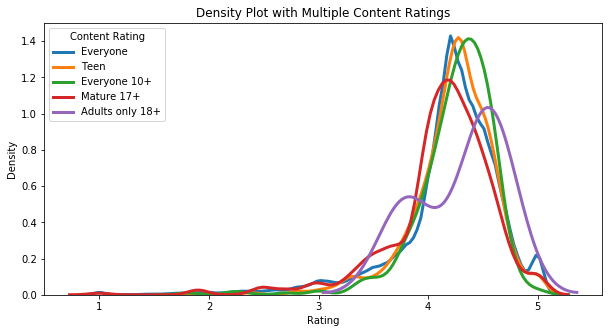

In [48]:
categories = dataSet["Content Rating"].unique()
# Iterate through the Different Categories of Content Rating
plt.figure(figsize=(10,5))
for category in categories:
    # Subset to the category
    subset = dataSet[dataSet['Content Rating'] == category]
    # Draw the density plot
    sns.distplot(subset['Rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = category)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Content Rating', fontsize=12)
plt.title('Density Plot with Multiple Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

### As we can see the mean Rating of each Content Rating value is almost the same

### Checking for Content Rating Categories independence using the Chi-Square test¶

In [49]:
contengency_table_ContentRating_Rating = pd.crosstab(dataSet["Rating"],dataSet["Content Rating"])
chi2_contingency = st.chi2_contingency(contengency_table_ContentRating_Rating)
print(chi2_contingency)

(227.84253737987024, 6.655721507497635e-05, 152, array([[4.42804428e-03, 1.28649446e+01, 6.11070111e-01, 7.36531365e-01,
        1.78302583e+00],
       [2.76752768e-04, 8.04059041e-01, 3.81918819e-02, 4.60332103e-02,
        1.11439114e-01],
       [8.30258303e-04, 2.41217712e+00, 1.14575646e-01, 1.38099631e-01,
        3.34317343e-01],
       [8.30258303e-04, 2.41217712e+00, 1.14575646e-01, 1.38099631e-01,
        3.34317343e-01],
       [1.10701107e-03, 3.21623616e+00, 1.52767528e-01, 1.84132841e-01,
        4.45756458e-01],
       [2.21402214e-03, 6.43247232e+00, 3.05535055e-01, 3.68265683e-01,
        8.91512915e-01],
       [2.21402214e-03, 6.43247232e+00, 3.05535055e-01, 3.68265683e-01,
        8.91512915e-01],
       [3.59778598e-03, 1.04527675e+01, 4.96494465e-01, 5.98431734e-01,
        1.44870849e+00],
       [3.32103321e-03, 9.64870849e+00, 4.58302583e-01, 5.52398524e-01,
        1.33726937e+00],
       [2.21402214e-03, 6.43247232e+00, 3.05535055e-01, 3.68265683e-01,
      

#### <span style="color:Red"> As the p-value is smaller than 0.05 we can tell that there is no relation between the Content Rating column and app Rating</span>

### Current Version
#### In this part we will try to extract number of versions an app produced till the time this dataset was recorded, according to the following steps:-
1. neglect versions with nan value
2. take the first part of the version value for example if version = 1.1.9 then new version will be 1
3. if a version starts with 0 then replace it with one as some apps start counting from 0
4. neglect versions that start with alphabets

In [50]:
# Number of records before exclusions
records_before = dataSet.shape[0]
print(dataSet.shape[0])
# Step 1
numberOfVersionProduced = dataSet[pd.notnull(dataSet['Current Ver'])]
# Extract Rating and Current Ver only
numberOfVersionProduced = numberOfVersionProduced[['Current Ver','Rating']]
# Step 2
numberOfVersionProduced['Current Ver'] = numberOfVersionProduced['Current Ver'].str.split(".", n = 1, expand = True)
# Step 3
numberOfVersionProduced[numberOfVersionProduced['Current Ver'] == 0] = '1'
print(numberOfVersionProduced['Current Ver'].unique())
# Step 4
numberOfVersionProduced = numberOfVersionProduced[numberOfVersionProduced['Current Ver'].str.isnumeric()]
print(numberOfVersionProduced['Current Ver'].unique())
# Change column types to integer in order to calculate Correlation 
numberOfVersionProduced['Current Ver'] = numberOfVersionProduced['Current Ver'].astype(int)
numberOfVersionProduced['Rating'] = numberOfVersionProduced['Rating'].astype(int)
# Calculate Remaining dataset percentage 
print((numberOfVersionProduced.shape[0]/records_before)*100)

10840
['1' '2' 'Varies with device' '6' '3' '5' '4' '11' '0' '8' '10' '18' '9'
 '15' '14' '7' '99' '12' '37' '24' '47' 'R6' '69' '42' '196' '2018' '20'
 '13' 'v1' '01' '43' '16' 'Cannonau 3' 'p5' '112' 'Public' '220' '858'
 'v3' 'Version:6' '02' '3196' '5423' '19' '1_39_93' '79' '108' '57' '60'
 '149' '37893' '20180609' '28' '25' '300000' 'PN' 'Initial' 'T4' '50' '27'
 '29' '584' '22' '71' '1004' '06' '2017' '17' '53' 'v5' 'MyMetro_HTML_2'
 'v8' 'v7' '32' '20180517' 'v150' '40' '68' 'FreeTimeApp-aosp_v3'
 'Natalia Studio Development' '30' '116' '04' '27500000' 'version 0'
 '5055' 'a' '31' '1009001' '1900001' 'v8[1' '23' '1805' '1,01' 'v2018'
 'H7SubTV0' 'v2' '263' '65' 'acremotecontrol18' 'v67_slk3'
 'airConditionerMaintenance_13112015' '11;11' 'acremotecontrol-v7'
 '1255162018' 'v4' '117' 'cli-6' 'Version 1' '132' '10001008' 'closed'
 '18060104' '568' '39' 'newversion' '666' '20180608' '20180620'
 'Z (Special Edition R9)' 'Cow V3' '3_1' 'Final' '250' 'Arrow-202' '26'
 'BL ONLINE PERSO

### Relation between number of versions and Rating for 83.6% of total dataset

In [51]:
print(numberOfVersionProduced.corr())

             Current Ver    Rating
Current Ver     1.000000  0.003579
Rating          0.003579  1.000000


### <span style="color:Red"> As we can see the correlation is very small and negative which does not make sense and this proves that the way used to calculate number of edits produced per app is not correct, accordingly we can not find the correlation between Current Ver and Rating</span>